<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
datos = datasets.load_boston()

In [ ]:
#datos están en formato json

In [ ]:
df = pd.DataFrame(datos.data, columns=datos.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
df.columns = ['tasa_criminalidad','terreno_residencial','proporcion_comercial',
          'lim_rio','oxido_nitrico','habitaciones','antiguedad','dist_empleo',
          'ind_carretera','tax','alumno_profesor','N','pct_estado']

In [ ]:
df.head()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.shape

(506, 13)

In [ ]:
df.describe()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
corrMatrix = df.corr()

In [ ]:
import matplotlib.pyplot as plt #Librería de visualización de datos

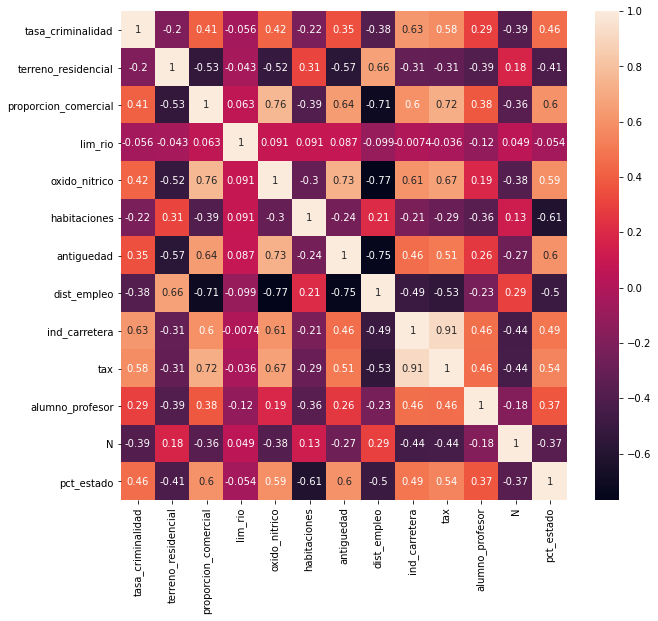

In [ ]:
fig, ax = plt.subplots(figsize= (10,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
price = pd.DataFrame(datos.target, columns=['Valor_medio_usd'])

In [ ]:
price.head()

,Valor_medio_usd
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
df.head()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.describe()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Revisar las condiciones del set de datos, hacer imputación de los datos faltantes y/o nulos, hacer limpieza de datos (quitar columnas, hacer merges, uniones, etc.)

## Train, test split

Dividir mis datos en la proporción de entrenamiento y prueba. Asignando mis variables predictivas a X y la variable a predecir (target) a Y

In [ ]:
X = df.copy(deep=True)

In [ ]:
X.head()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Y = price['Valor_medio_usd'] #.copy(deep=True)

In [ ]:
Y.head() #El índice ya no lo considera como una columna dentro de la tabla

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Valor_medio_usd, dtype: float64

In [ ]:
X.shape

(506, 13)

In [ ]:
Y.shape

(506,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=99)

In [ ]:
x_train.head()

,tasa_criminalidad,terreno_residencial,proporcion_comercial,lim_rio,oxido_nitrico,habitaciones,antiguedad,dist_empleo,ind_carretera,tax,alumno_profesor,N,pct_estado
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
212,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
271,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59


In [ ]:
506*0.2

101.2

In [ ]:
x_test.shape

(102, 13)

In [ ]:
506*0.8

404.8

In [ ]:
x_train.shape

(404, 13)

# Entrenamiento del modelo

In [ ]:
from sklearn import linear_model
#from sklearn import DecisionTree

In [ ]:
lm = linear_model.LinearRegression() #Instanciamos el modelo
#lm = DecisionTree.TreeRegressor()

In [ ]:
model = lm.fit(x_train, y_train)

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
y_pred

array([34.30470984, 34.82988624, 25.16108364, 24.30365005, 34.53326928,
       20.00792418, -0.96025011, 16.67357788, 20.23064349, 18.33330249,
       13.95186776, 18.83877217, 10.74660426,  7.01757302, 22.83005791,
       20.19361722, 30.8842644 , 20.02802823, 31.67699555, 11.00695723,
       17.40139425, 15.44620408, 25.07051142, 16.01033994, 15.55776634,
       20.40518628, 35.39436975, 19.12476686, 20.86920908, 18.02526894,
       34.76905925,  9.00317687, 33.06752075, 11.179285  , 19.02978059,
       37.38643461, 29.14915379, 22.48358548, 20.72501706, 26.5911557 ,
       30.87435546, 29.00016756, 24.63152414,  8.38637841, 21.83688845,
       15.66681394, 17.74255121, 34.91315027, 28.17233714, 19.52634526,
       20.68993771, 30.93905064, 21.51049815, 15.47113299, 20.28499152,
       19.81393731,  7.83968543, 40.39861997, 14.04685112, 14.57642796,
       -5.67940569, 33.60919797, 19.91558853, 22.77679722, 28.86450489,
       32.29630513, 28.39753577, 24.68781436, 32.84414939, 23.46

In [ ]:
y_test

281    35.4
273    35.2
251    24.8
329    22.6
40     34.9
       ... 
265    22.8
72     22.8
306    33.4
484    20.6
324    25.0
Name: Valor_medio_usd, Length: 102, dtype: float64

/Users/fridaruh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valor_medio_usd'>

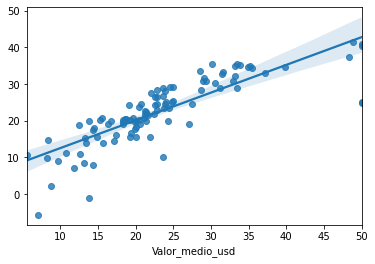

In [ ]:
sns.regplot(y_test,y_pred )

In [ ]:
model.coef_

array([-1.23722939e-01,  4.80675979e-02,  2.10770545e-02,  1.91614625e+00,
       -1.45214109e+01,  3.85567154e+00, -1.63543420e-05, -1.46536228e+00,
        2.73513872e-01, -1.19356286e-02, -9.27515834e-01,  7.31312963e-03,
       -5.72582953e-01])

In [ ]:
X.columns

Index(['tasa_criminalidad', 'terreno_residencial', 'proporcion_comercial',
       'lim_rio', 'oxido_nitrico', 'habitaciones', 'antiguedad', 'dist_empleo',
       'ind_carretera', 'tax', 'alumno_profesor', 'N', 'pct_estado'],
      dtype='object')

In [ ]:
coef_parametro = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

In [ ]:
coef_parametro

,Coef
tasa_criminalidad,-0.123723
terreno_residencial,0.048068
proporcion_comercial,0.021077
lim_rio,1.916146
oxido_nitrico,-14.521411
habitaciones,3.855672
antiguedad,-0.000016
dist_empleo,-1.465362
ind_carretera,0.273514
tax,-0.011936


In [ ]:
lm.intercept_

35.31920202133202

Objetivo de score es acercarse a 1, tanto en train como en test

In [ ]:
model.score(x_test,y_test)

0.6674690355194657

In [ ]:
model.score(x_train, y_train)

0.7576598542832372

Objetivo de R2 también será acercarse a 1

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test, y_pred)

0.6674690355194657